# AMATH 585 Homework 5
## Shannon Dow
Question 5(b)

In [5]:
%matplotlib inline

In [6]:
from pylab import *

In [7]:
import logging
logging.captureWarnings(True)
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.sparse import diags
import scipy.sparse.linalg as sp_linalg

In [4]:
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display

def animate_figs(figs):
    show_frame = lambda frameno: display(figs[frameno])
    interact(show_frame, frameno=widgets.IntSlider(min=0,max=len(figs)-1, value=0))

For this problem, we want to solve: $\frac{d}{dx}\left(\kappa(x) u'(x)\right) = f(x)$
where
$$ \kappa(x)  = 0.1 (x<0.5)  = 1 (x>0.5)$$



In [4]:
def kap(x):
    if x < 0.5:
        k = 0.1
    if x > 0.5:
        k = 1
    return k

In [5]:
def utrue_fcn(x): 
    u = []
    l = len(x)
    for i in range(0,l):
        if x[i] < 0.5:
            newu = (20/11)*x[i]
            u.append(newu)
        elif x[i] >= 0.5:
            newu = (2/11)*x[i]+(9/11)
            u.append(newu)
    return u
        

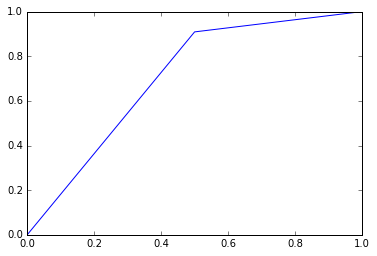

In [6]:
xt = linspace(0,1,21)
plot(xt,utrue_fcn(xt))

In [7]:
f_fcn = lambda x: 0*x

In [8]:
def update_u_SOR(U, F, h, x,omega):
    """
    Input: Current iterate U^[k-1]
    Output: Next iterate U^[k]
    """
    
    m = len(U) - 2
    for i in range(1,m+1):
        U[i] = (1/(kap((i-0.5)/(m+1))+kap((i+0.5)/(m+1))))*(kap((i-0.5)/(m+1))*U[i-1] + kap((i+0.5)/(m+1))*U[i+1] - h**2 * F[i])*omega \
               + (1-omega)*U[i]
    return U

In [9]:
def solve_bvp(f_fcn, utrue_fcn, m, update_u, maxiter, kplot,omega):

    alpha = 0
    beta = 1

    h = 1./(m+1)
    x = linspace(0,1,m+2)

    utrue = utrue_fcn(x)
    F = f_fcn(x)

    U0 = linspace(alpha, beta, m+2) # initial guess
    U = U0.copy() # current iterate

    max_error = abs(U-utrue).max()
    errors = [max_error]

    figs = []  # for the list of figures we generate
    for k in range(1,maxiter+1):
        if k==0.5:
            U = (10/11)
        else:
            U = update_u(U, F, h, x,omega)  # take one iteration
        
        max_error = abs(U-utrue).max()
        errors.append(max_error)
    
        if mod(k,kplot)==0 or k==maxiter:
            # every kplot iterations create a plot:
            fig = figure(figsize=(12,5))
            plot(x,U0,'r-o', label='initial guess')
            plot(x,utrue,'k-o', label='true solution')
            plot(x,U,'bo-', label= 'iteration k = %i' % k)
            legend()
            grid(True)
            xlim(0,1)
            ylim(0, 3)
            title('After %i iterations, max error = %.2e' \
                  % (k, max_error))
            figs.append(fig)
            close(fig)
            
    errors = array(errors)  # convert list to numpy array
    return errors, figs

In [10]:
def convergence_rate(k_vals, errors):
    n = len(k_vals)
    assert len(errors) == n, 'k_vals and errors must have the same length'
    print('Estimating rate based on %i values' % n)
    B = vstack((ones(n),k_vals)).T
    logE = log(errors)
    
    # solve least square problem:
    c, residuals, rank, s = lstsq(B,logE,rcond=None)
    
    logC = c[0]
    logrho = c[1]
    C = exp(logC)
    rho = exp(logrho)
    print('Convergence approximately like  E(k) = %.3f * rho**k   with rho = %.8f' % (C,rho))

Estimating rate based on 50 values


TypeError: a float is required

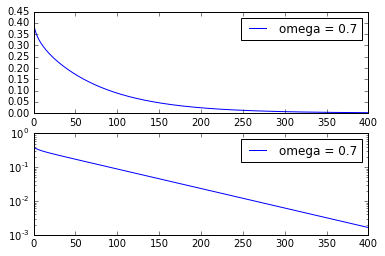

In [38]:
m=19
om = [0.7,1,1.7]

for i in range(0,3):
    errors_SOR, figs = solve_bvp(f_fcn, utrue_fcn, m=m, update_u=update_u_SOR, maxiter=400, kplot=20, omega = om[i])
    name = 'omega = '+ str(om[i]);
    subplot(2,1,1)
    plot(errors_SOR,label=name)
    legend()
    grind = True
    subplot(2,1,2)
    semilogy(errors_SOR,label=name)
    legend()
    grind = True
    k_vals = arange(50,100,dtype = int)
    rho = convergence_rate(k_vals,errors_SOR[k_vals])
    print('The convergence rate for '+ name +" is "+ str(rho))
    


From the above curves, you can see that it is fastest for $\omega$ = 1.7, and the slowest for 0.7. In general the $\omega$ should be between -2 and 2. It appears that 1.7 is closer to the optimal $\omega$. 


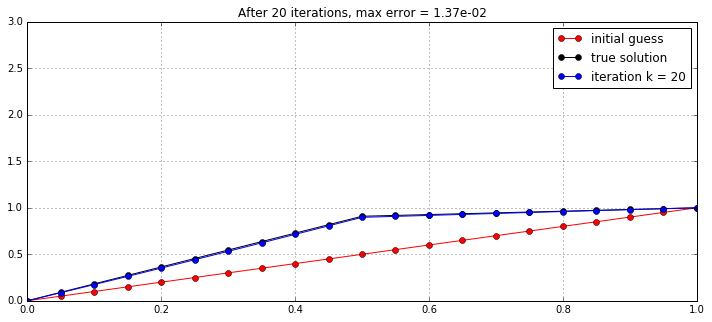

In [12]:
animate_figs(figs)

Note: I could not get the convergence_rate funciton to work. I believe it has something to do with the way lstsq works. I get the same exact error if I run the professor's code as well. I was able to use the same code to run on another laptop (where the PDF comes from)! 